# 📊 Exploratory Data Analysis (EDA) – Customer Churn

This notebook explores the customer churn dataset to uncover patterns and trends affecting churn behavior.

## Objectives
- Visualize churn rate by contract type, tenure, and monthly charges
- Analyze churn rate by payment method
- Compute correlations among numeric features
- Derive business insights for decision-making

🧰 Tools Used: `pandas`, `matplotlib`, `seaborn`

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/churn_dataset.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:", df.isnull().sum().sum())
print("\nChurn distribution:\n", df["Churn"].value_counts(normalize=True))

# Convert churn to numeric for analysis
df["Churn_Flag"] = df["Churn"].map({"Yes": 1, "No": 0})

Shape: (6000, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Churn distribution:
 Churn
No     0.574667
Yes    0.425333
Name: proportion, dtype: float64


Contract
Month-to-month    0.513319
One year          0.340145
Two year          0.211604
Name: Churn_Flag, dtype: float64


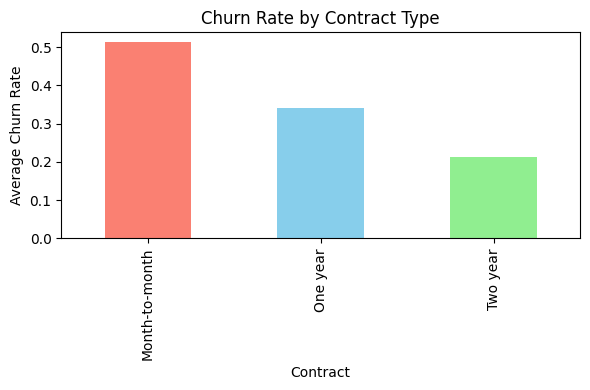

In [11]:
contract_churn = df.groupby("Contract")["Churn_Flag"].mean().sort_values(ascending=False)
print(contract_churn)

plt.figure(figsize=(6, 4))
contract_churn.plot(kind="bar", color=["salmon", "skyblue", "lightgreen"])
plt.title("Churn Rate by Contract Type")
plt.ylabel("Average Churn Rate")
plt.tight_layout()
plt.show()

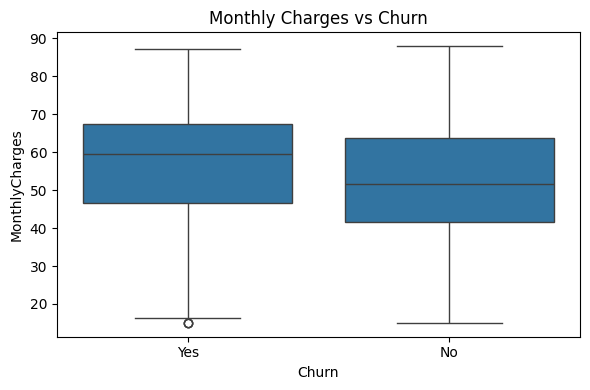

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.show()

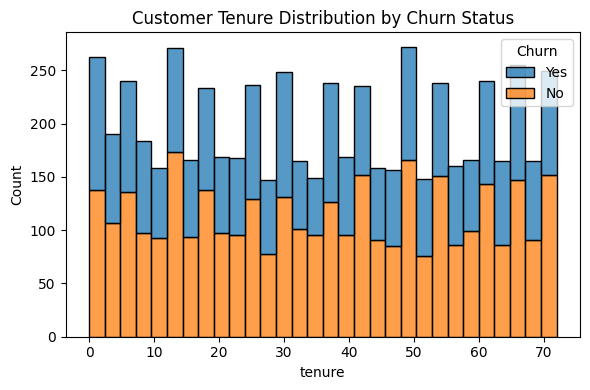

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Customer Tenure Distribution by Churn Status")
plt.tight_layout()
plt.show()

PaymentMethod
Electronic check             0.531662
Credit card (automatic)      0.376696
Bank transfer (automatic)    0.349621
Mailed check                 0.342999
Name: Churn_Flag, dtype: float64


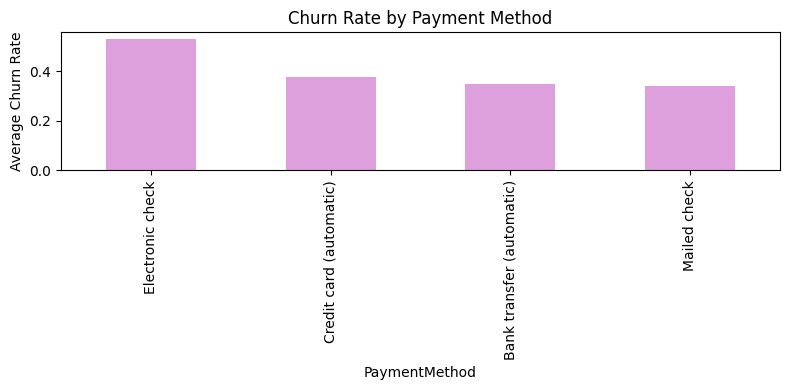

In [14]:
payment_churn = df.groupby("PaymentMethod")["Churn_Flag"].mean().sort_values(ascending=False)
print(payment_churn)

plt.figure(figsize=(8, 4))
payment_churn.plot(kind="bar", color="plum")
plt.title("Churn Rate by Payment Method")
plt.ylabel("Average Churn Rate")
plt.tight_layout()
plt.show()

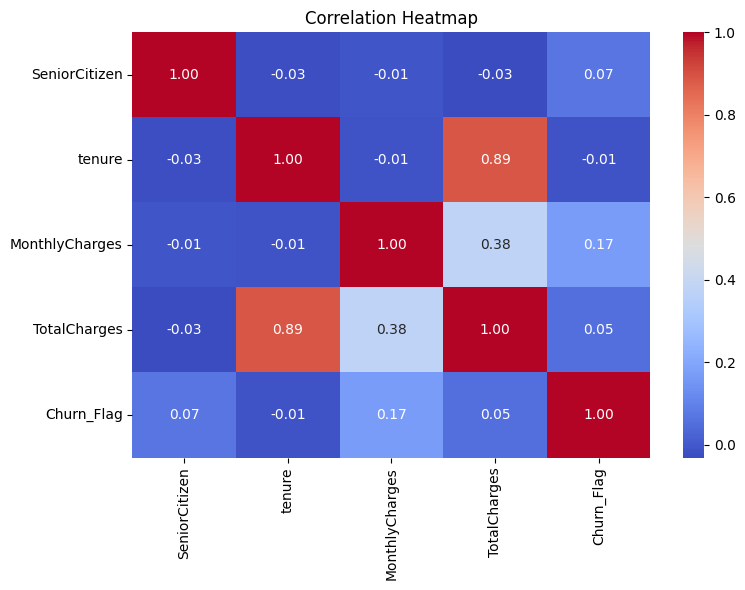

In [15]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [16]:
insights = []
if contract_churn["Month-to-month"] > 2 * contract_churn["Two year"]:
    insights.append("Customers on month-to-month contracts are over twice as likely to churn.")
if df["MonthlyCharges"].mean() < df[df["Churn"] == "Yes"]["MonthlyCharges"].mean():
    insights.append("Customers who churn tend to have higher monthly charges on average.")
if df["tenure"].mean() > df[df["Churn"] == "Yes"]["tenure"].mean():
    insights.append("Churned customers generally have shorter tenure (lower loyalty).")
if payment_churn.max() > 0.5:
    insights.append(f"Payment method '{payment_churn.idxmax()}' shows the highest churn rate ({payment_churn.max():.2f}).")

print("💼 Business Insights:")
for i, line in enumerate(insights, 1):
    print(f"{i}. {line}")

💼 Business Insights:
1. Customers on month-to-month contracts are over twice as likely to churn.
2. Customers who churn tend to have higher monthly charges on average.
3. Churned customers generally have shorter tenure (lower loyalty).
4. Payment method 'Electronic check' shows the highest churn rate (0.53).
